In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4:  Numerical Differentiation and Quadrature

## Question 1

Consider the case where we have a mixed set of values $(x, y)$ where $y = f(x)$ but still would like to find finite difference formulas.  Consider for this question the case where we know the values of $f(x)$ at $x_0 = 0, x_1 = \Delta x, x_2 = 2 \Delta x$, and the value of $y' = f'(x)$ at $x_0=0$ only.

**(a)** (10) Find a finite difference approximation for the second derivative of the form

$$
    f''(0) = \frac{\sum^2_{i=0} w_i f(x_i)}{\Delta x^2} + \frac{b_0 f'_0}{\Delta x}
$$

that is as accurate as possible in the asymptotic limit $\Delta x \rightarrow 0$.

Here we can approximate the values of the functions at each point $f(x_n)$, $f(x_{n+1})$, $f(x_{n+2})$ using the general taylor series.
$$
f(x) = f(x_n) + (x-x_n) f'(x_n) + \frac{(x-x_n)^2}{2!}f''(x_n) + \frac{(x-x_n) ^3}{3!}f'''(x_n) + \frac{(x-x_n)^4}{4!}f'''(x_n) + \mathcal{O}(\Delta x^5)
$$

Thus we have taylor series expansions
$$
f(x_n) = f(x_n)
$$

$$
f(x_{n+1}) = f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!}f''(x_n) + \frac{\Delta x^3}{3!}f'''(x_n) + \frac{\Delta x^4}{4!}f'''(x_n) + \mathcal{O}(\Delta x^5)
$$

$$
f(x_{n+2}) = f(x_n) + 2\Delta x f'(x_n) + \frac{4\Delta x^2}{2!}f''(x_n) + \frac{8\Delta x^3}{3!}f'''(x_n) + \frac{16\Delta x^4}{4!}f'''(x_n) + \mathcal{O}(\Delta x^5)
$$

Then we assume our solution of form $f''(x_n) = \frac{A(f(x_n) + Bf(x_{n+1}) + Cf(x_{n+2})}{\Delta x^2}$ and get the following expression

$$
\Delta x^2 (f''(x_n) + R(x_n)) = A f(x_n) + B(f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!}f''(x_n) + \frac{\Delta x^3}{3!}f'''(x_n) + \frac{\Delta x^4}{4!}f'''(x_n) + \mathcal{O}(\Delta x^5)) + C(f(x_n) + 2\Delta x f'(x_n) + \frac{4\Delta x^2}{2!}f''(x_n) + \frac{8\Delta x^3}{3!}f'''(x_n) + \frac{16\Delta x^4}{4!}f'''(x_n) + \mathcal{O}(\Delta x^5))
$$

We then choose A, B, C to kill off all terms except for the $f'$ and $f''$ terms until the $\Delta x^4$ term. Since we know the value of $f'(0)$, instead of killing it like normal, we can pull the terms into their own expression and form a 4th equation that expresses coefficient $b_0$ in terms of A, B, and C. Thus we can read off the following system of equations

$$
\begin{align}
A + B + C &= 0 \\
\frac{1}{2}B + 2C &= 1 \\
B\frac{1}{6} + C\frac{8}{6} &= 0 \\
B + 2C &= b_0
\end{align}
$$

We solve this system and get our coefficients, $A = -\frac{7}{2}$, $B=4$, $C=-\frac{1}{2}$, then we use them to find our coefficient on our $f'$ term $b_0 = 4 + 2(-\frac{1}{2}) = 3$

Now we can read off our approximation
$$
    f''(0) = \frac{\sum^2_{i=0} w_i f(x_i)}{\Delta x^2} + \frac{b_0 f'_0}{\Delta x}
$$

Where $w = [-\frac{7}{2}, 4, -\frac{1}{2}]$ and $b_0 = 3$

And our error term, which is 
$$
\begin{align}
R(x_n) &= \frac{4\Delta x^2}{4!}f^{(4)}(x_n) - \frac{8 \Delta x^2}{4!}f^{(4)}(x_n) + \mathcal{O}(\Delta x^3) \\
R(x_n) &= -\frac{\Delta x^2}{6} f^{(4)}(x_n) + \mathcal{O}(\Delta x^3)\\
R(x_n) &= \mathcal{O}(\Delta x^2)
\end{align}
$$

In [2]:
# Solve our system of equations using numpy.linalg.solve
a = numpy.array([[1, 1, 1],
               [0, 1.0/2.0, 2.0],
               [0, 1.0/6.0, 8.0/6.0]])
b = numpy.array([0, 1, 0])
print numpy.linalg.solve(a, b)

[-3.5  4.  -0.5]


**(b)** (10) Test the finite difference formula from part (a) on

1. $\cos \pi x$ and
1. $x^{5/2}$

plotting the order of convergence for each.

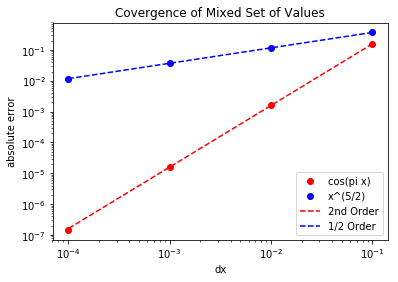

In [3]:
def approx(f_x, f_prime_0):
    """
    Approximate the second derivative of f
    at x = 0 with the above formula

    Parameters
    ----------
    f_x: numpy.ndarray
        The values of f @ x=0, x=1, x=2
    f_prime_0: float
        The value of the derivative of f @ x=0
    
    Returns
    -------
    float:
        Approximation of f'' @ x=0
        
    """
    delta_x = x[1] - x[0]
    coef = [-7.0/2.0, 4.0, -1.0/2.0]
    b_0 = coef[1] + 2.0 * coef[2]
    return numpy.dot(coef, f_x) / (delta_x ** 2) + (b_0 * f_prime_0) / delta_x 

# function 1
# f(x) = cos(pi*x)
# f'(x) = -pi * sin(pi*x)
# f''(x) = -pi^2*cos(pi*x)
f_1 = lambda x: numpy.cos(numpy.pi * x)
f_prime_1 = lambda x: -numpy.pi * numpy.sin(numpy.pi * x)
f_double_prime_1 = lambda x: -numpy.pi ** 2.0 * numpy.cos(numpy.pi * x)

# function 2
# f(x) = x^(5/2)
# f'(x) = (5/2)x^(3/2)
# f'(x) = (15/4)x^(1/2)
f_2 = lambda x: x ** (5.0/2.0)
f_prime_2 = lambda x: (5.0/2.0) * x ** (3.0/2.0)
f_double_prime_2 = lambda x: (15.0/4.0) * x ** (1.0/2.0)

# Calculate Absolute Errors
start_val = 0
delta_x = numpy.array([10**(-n) for n in range(1, 5)]) 
errors = numpy.zeros((2, len(delta_x)))
for idx, dx in enumerate(delta_x):
    x = numpy.array([start_val + i * dx for i in range(3)])
    errors[0][idx] = numpy.abs(approx(f_1(x), f_prime_1(x[0])) - f_double_prime_1(x[0]))
    errors[1][idx] = numpy.abs(approx(f_2(x), f_prime_2(x[0])) - f_double_prime_2(x[0]))

    
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
plt.loglog(delta_x, errors[0], 'ro', label="cos(pi x)")
plt.loglog(delta_x, errors[1], 'bo', label="x^(5/2)")
plt.loglog(delta_x, order_C(delta_x[0], errors[0][0], 2) * delta_x**2, 'r--', label="2nd Order")
plt.loglog(delta_x, order_C(delta_x[0], errors[1][0], 0.5) * delta_x**0.5, 'b--', label="1/2 Order")
plt.xlabel('dx')
plt.ylabel('absolute error')
plt.title('Covergence of Mixed Set of Values')
plt.legend()

**(c)** (5) Explain your results from part (a) and (b) given what you know of the functions and the finite difference approximation you derived.

For this approximation we have error term

$$
R(x_n) = -\frac{\Delta x^2}{6} f^{(4)}(x_n)
$$

So we know that the error term is $\mathcal{O}(\Delta x^2)$, which indicates second order convergence. However, we can also see that it will depend heavily on the value of $f^{(4)}$. For $cos(\pi x)$, we have $f^{(4)} = \pi^4 cos(\pi x)$ and $f^{(4)}(0) = \pi^4$. Since $f^{(4)}$ is well behaved doesn't blow up about $x_n$, we expect the second order convergence to hold. For $x^{\frac{5}{2}}$ we have $f^{(4)} = -\frac{15}{16} x^{-\frac{3}{2}}$, which blows up to negative infinity as $x \rightarrow 0$. Thus we expect much slower than second order convergence as the derivative term will blow up and cause larger than expected error. 


## Question 2 - Quadrature

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.

**(a)** (10) Write a function that computes both integrals using the  trapezoidal rule with N partitions of equal length "ignoring" the singularity at $x=0$ by setting integrands to 0.

In [4]:
def trap_1(N):
    """
    Calculate I_c and I_s using the trapazoidal rule
    with N partition. Ignores the singularity setting
    the integrand to 0
    
    Parameters
    ----------
    N: Int
        The number of partitions
        
    Returns
    -------
    (Is, Ic): (float, float)
        The values of I_c and I_s
        
    """
    f_c = lambda x: numpy.cos(x) / numpy.sqrt(x)
    f_s = lambda x: numpy.sin(x) / numpy.sqrt(x)
    
    x_hat = numpy.linspace(0, 1, N + 1)
    delta_x = x_hat[1] - x_hat[0]

    Is = f_s(x_hat[-1]) * (delta_x / 2.0)
    Ic = f_c(x_hat[-1]) * (delta_x / 2.0)

    for j in range(1, N):
        Is += f_s(x_hat[j]) * delta_x
        Ic += f_c(x_hat[j]) * delta_x
        
    return Is, Ic

In [5]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_1(200)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print "Computed the integrals correctly using the trapezoidal rule only."    

Error: 7.32497950294e-05
Computed the integrals correctly using the trapezoidal rule only.


**(b)** (10) A weighted Newton-Cotes quadrature rule is a modification of our version of Newton-Cotes quadrature except that we also multiply by a weighting function such that

$$\int^1_0 w(x) f(x) dx = \sum^{N}_{i=1} w_i f(x_i)$$

For the weight $x^{-1/2}$ we can show that 

$$\int^1_0 \frac{f(x)}{\sqrt{x}} dx \approx \frac{2}{3} (2 f(0) + f(1))$$

Combining this formula with the trapezoidal rule approach above, evaluate the integrals again by using the trapezoid rule except for the partition $[0,\Delta x]$ that involves the singularity use the above weighted Newton-Cotes rule.  Note that you will have to map the rule to the partition.

Here we make the change of variables 
$$
t = Nx \\
dt = N dx
$$

We then have

$$
\int_0^{\frac{1}{N}} \frac{f(x)}{\sqrt x}dx = \int_0^1 \frac{f(\frac{t}{N})}{\sqrt\frac{t}{N}N}dt =
\frac{1}{N} \int_0^1 \frac{f(\frac{t}{N})}{\sqrt\frac{t}{N}}dt = \frac{2}{3N}(2(f(0) + f(1))
$$

So for our case we have

$$
I_s[0, \Delta x] = \frac{2}{3N}(2sin(0)  + sin \frac{1}{N}) \\
I_c[0, \Delta x] = \frac{2}{3N}(2cos(0) + cos \frac{1}{N})
$$

In [6]:
def trap_wnc(N):
    """
    Calculate I_c and I_s using the trapazoidal rule
    with N partition. Approximates the singularity using 
    a newton cotes rule
    
    Parameters
    ----------
    N: Int
        The number of partitions
        
    Returns
    -------
    (Is, Ic): (float, float)
        The values of I_c and I_s
        
    """
    f_c = lambda x: numpy.cos(x) / numpy.sqrt(x)
    f_s = lambda x: numpy.sin(x) / numpy.sqrt(x)
    
    x_hat = numpy.linspace(0, 1, N + 1)
    delta_x = x_hat[1] - x_hat[0]
    
    f_s_0 = (2.0 / (3.0 * N)) * (2.0 * numpy.sin(x_hat[0] / N) + numpy.sin(x_hat[-1] / N))
    f_c_0 = (2.0 / (3.0 * N)) * (2.0 * numpy.cos(x_hat[0] / N) + numpy.cos(x_hat[-1] / N))

    Is = f_s_0 + (f_s(x_hat[-1]) * (delta_x / 2.0))
    Ic = f_c_0 + (f_c(x_hat[-1]) * (delta_x / 2.0))

    for j in range(1, N):
        Is += f_s(x_hat[j]) * delta_x
        Ic += f_c(x_hat[j]) * delta_x
    return Is, Ic

In [7]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_wnc(200)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print "Computed the integrals correctly using the trapezoidal and Newton-Cotes rules."    

Error: 5.65831978071e-05
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(c)** (10) Do a change of variables $x = t^2$ and evaluate each integral using the trapezoidal rule for the entire domain.

With change of variable 

$$
x = t^2 \\
dx = 2tdt
$$

We get the integrals

$$
I_s = \int_{0^2}^{1^2} \frac{sin(t^2)}{t}2tdt = \int_0^1 2sin(t^2)dt \\ 
I_c = \int_{0^2}^{1^2} \frac{cos(t^2)}{t}2tdt = \int_0^1 2cos(t^2)dt 
$$

In [8]:
def trap_transformed(N):
    """
    Calculate I_c and I_s using the trapazoidal rule
    with N partition. Deals with the singularity
    by using the change of variable x=t^2
    
    Parameters
    ----------
    N: Int
        The number of partitions
        
    Returns
    -------
    (Is, Ic): (float, float)
        The values of I_c and I_s
        
    """
    f_c = lambda t: 2.0 * numpy.cos(t ** 2.0)
    f_s = lambda t: 2.0 * numpy.sin(t ** 2.0)
    
    t_hat = numpy.linspace(0, 1, N + 1)
    delta_t = t_hat[1] - t_hat[0]
    
    Is = (f_s(t_hat[0]) + f_s(t_hat[-1])) * (delta_t / 2.0)
    Ic = (f_c(t_hat[0]) + f_c(t_hat[-1])) * (delta_t / 2.0)

    for j in range(1, N):
        Is += f_s(t_hat[j]) * delta_t
        Ic += f_c(t_hat[j]) * delta_t

    return Is, Ic

In [9]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_transformed(200)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-5)
print "Computed the integrals correctly using the trapezoidal rule."    

Error: 4.50254425055e-06
Computed the integrals correctly using the trapezoidal rule.


**(d)** (10) Do the same as in part (c) but use 3-point Gauss-Legendre quadrature.

In [10]:
def gauss_legendre_3(N):
    """
    Calculate I_c and I_s using 3-point.
    Gauss-Legendre quadrature. Deals with the 
    singularity by using the change of variable x=t^2
    
    Parameters
    ----------
    N: Int
        The number of partitions
        
    Returns
    -------
    (Is, Ic): (float, float)
        The values of I_c and I_s
        
    """
    f_c = lambda t: 2.0 * numpy.cos(t ** 2.0)
    f_s = lambda t: 2.0 * numpy.sin(t ** 2.0)
    
    t_hat = numpy.linspace(0, 1, N + 1)
    delta_t = t_hat[1] - t_hat[0]

    ti_map = lambda a,b,ti : (b - a) / 2.0 * ti + (a + b) / 2.0
    ti = [-numpy.sqrt(3.0 / 5.0), 0.0, numpy.sqrt(3.0 / 5.0)]
    w = [5.0 / 9.0, 8.0 / 9.0, 5.0 / 9.0]
    
    Is = 0.0
    Ic = 0.0
    for i in range(0, N):
        for k in range(len(ti)):
            Is += f_s(ti_map(t_hat[i], t_hat[i+1], ti[k])) * w[k]
            Ic += f_c(ti_map(t_hat[i], t_hat[i+1], ti[k])) * w[k]
    Is *= delta_t / 2.0
    Ic *= delta_t / 2.0
    
    return Is, Ic

In [11]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = gauss_legendre_3(10)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-10)
print "Computed the integrals correctly using the trapezoidal and Newton-Cotes rules."    

Error: 8.57062198989e-11
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(e)** (5) Check the order of accuracy for each of the methods above and plot these on a `loglog` plot with appropriate reference lines to indicate the order of each.

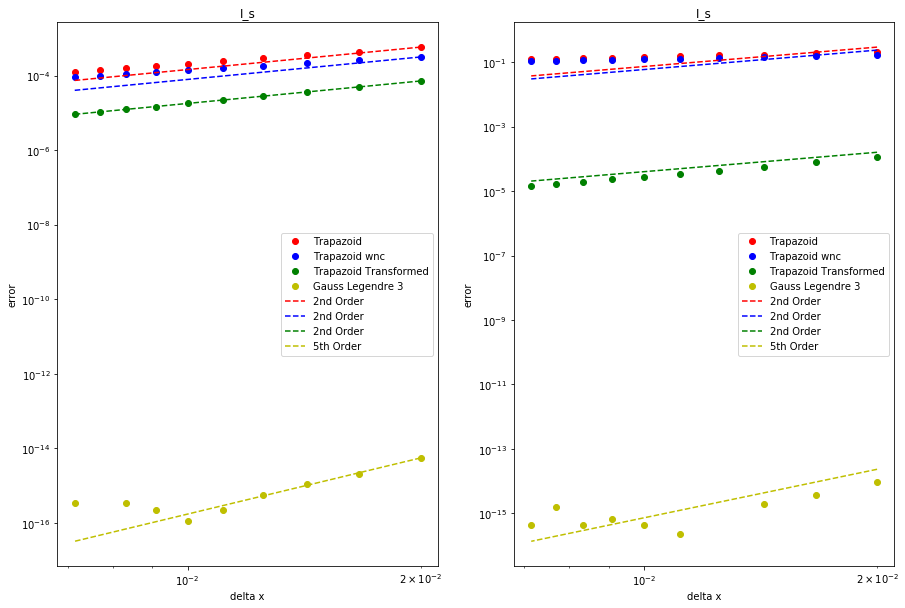

In [12]:
import scipy.special

num_partitions = range(50, 150, 10)

# Trial results
delta_x = numpy.empty(len(num_partitions))
error_trap_1 = numpy.empty((2, len(num_partitions)))
error_trap_2 = numpy.empty((2, len(num_partitions)))
error_trap_trans = numpy.empty((2, len(num_partitions)))
error_gauss = numpy.empty((2, len(num_partitions)))

# True values of Is and Ic
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)

for (j, N) in enumerate(num_partitions):
    
    # Calculate delta_x for the trial
    x_hat = numpy.linspace(0.0, 1.0, N + 1)
    delta_x[j] = x_hat[1] - x_hat[0]
    
    # trap_1 trial
    Is_hat, Ic_hat = trap_1(N)
    error_trap_1[0, j] = numpy.abs(Is_hat - Is)
    error_trap_1[1, j] = numpy.abs(Ic_hat - Ic)

    # trap_wnc trial
    Is_hat, Ic_hat = trap_wnc(N)
    error_trap_2[0, j] = numpy.abs(Is_hat - Is)
    error_trap_2[1, j] = numpy.abs(Ic_hat - Ic)
    
    # trap_transformed trial
    Is_hat, Ic_hat = trap_transformed(N)
    error_trap_trans[0, j] = numpy.abs(Is_hat - Is)
    error_trap_trans[1, j] = numpy.abs(Ic_hat - Ic)
    
    # gauss legendre trial
    Is_hat, Ic_hat = gauss_legendre_3(N)
    error_gauss[0, j] = numpy.abs(Is_hat - Is)
    error_gauss[1, j] = numpy.abs(Ic_hat - Ic)

# Plot results
fig = plt.figure(figsize=(15, 10))
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
for i in range(2):
    axes = fig.add_subplot(1, 2, i + 1)
    axes.loglog(delta_x, error_trap_1[i], 'ro', label="Trapazoid")
    axes.loglog(delta_x, error_trap_2[i], 'bo', label="Trapazoid wnc")
    axes.loglog(delta_x, error_trap_trans[i], 'go', label="Trapazoid Transformed")
    axes.loglog(delta_x, error_gauss[i], 'yo', label="Gauss Legendre 3")

    axes.loglog(delta_x, order_C(delta_x[i], error_trap_1[i][0], 2) * delta_x**2, 'r--', label="2nd Order")
    axes.loglog(delta_x, order_C(delta_x[i], error_trap_2[i][0], 2) * delta_x**2, 'b--', label="2nd Order")
    axes.loglog(delta_x, order_C(delta_x[i], error_trap_trans[i][0], 2) * delta_x**2, 'g--', label="2nd Order")
    axes.loglog(delta_x, order_C(delta_x[i], error_gauss[i][0], 5) * delta_x**5, 'y--', label="5th Order")

    axes.legend()
    axes.set_ylabel("error")
    axes.set_xlabel("delta x")
    axes.set_title("I_s")

**(f)** (5) Comment on the results of this question and the vast differences in convergence rates even between the two integrations (why is $I_c$ less accurate than $I_s$).

By examining the plots of $I_c$ and $I_s$, it is clear that they both have singularities at the origin, but as $x \rightarrow 0$, $I_c \rightarrow \infty$ while  $I_s \rightarrow 0$. From here we see that it is much easier to approximate the first partition for $I_s$ because we can just choose a value close to 0 and not be too far off. When we don't have the singularities, the integral convergence rates are roughly equal. 

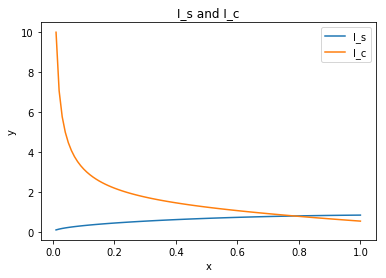

In [13]:
x = numpy.linspace(0.01, 1, 100)

I_s = lambda x: numpy.sin(x) / numpy.sqrt(x)
I_c = lambda x: numpy.cos(x) / numpy.sqrt(x)

plt.figure()
plt.plot(x, I_s(x), label="I_s")
plt.plot(x, I_c(x), label="I_c")
plt.xlabel('x')
plt.ylabel('y')
plt.title('I_s and I_c')
plt.legend()

## Question 3

We can often reformulate finite difference approximations as matrix-vector products.  For the following assume that the data considered are equi-spaced points $(x_i, y_i)$, i.e. $\Delta x$ is uniform.

**(a)** (10) Using a second order centered finite difference approximation to the second derivative and the appropriate forward and backward difference schemes at the edges of the domain find the matrix $D$ such that multiplying a vector of $y$ values would lead to a second order approximation of the derivative for the given data.

For a second order centered finite difference appoximation of the second derivative, we have the following formula

$$
f''(x_n) = \frac{f(x_{n+1}) - 2 f(x_n) + f(x_{n-1})}{\Delta x^2}
$$

On the boundries we use 2nd order forward and backward differences, which are the following

$$
f''(x_0) = \frac{(2f(x_0) - 5f(x_1)) + (4f(x_2) - f(x_3))}{\Delta x^2} \\
f''(x_n) = \frac{(2f(x_n) - 5f(x_{n-1})) + (4f(x_{n-2}) - f(x_{n-3}))}{\Delta x^2} 
$$

We can factor out the $\Delta x^2$ term because it will occur in all our terms. This means we are left with constant coefficients on each of our f(x) terms. Thus using the expressions above, we can set up the $N \times N$ matrix 

$$
D = 
\frac{1}{\Delta x ^2}\begin{bmatrix}
2 & -5 & 4 & -1 & \\
1 & - 2 & 1  \\
& 1 & - 2 & 1  \\
&& 1 & - 2 & 1  \\
&&& 1 & - 2 & 1  \\
&&&&& \dots \\
&&&&& 1 & -2 & 1 \\
&&&&-1 & 4 & -5 & 2
\end{bmatrix} 
$$

It is clear that when we dot this matrix with our vector of y values, each of the terms in the resulting vector will have the form we spelled out above as the 0 values will exclude the unneeded terms and the non 0 values give the y values their coefficients.

**(b)** (10) Write a function that takes in the number of data points $N$ and returns the matrix $D$.  Here assume we are on the interval $[-1, 1]$.  Note that inside your function 
$$
    \Delta x = \frac{2}{N - 1}
$$
to match the `linspace` command.

Beyond being convenient (once you construct the matrix you can apply it to any set of data) this operation is much faster than using loops.

In [14]:
def diff_matrix(N):
    """
    Create a matrix of the above form, that 
    when multiplied against a vector of y
    values yields a vector of approximate y'' values
    
    Parameters
    ----------
    N: int
        The number (x, y) values we are approximating
    
    Returns
    -------
    D: numpy.ndarray
        Matrix of the above form
    """
    delta_x = 2.0 / (N - 1)
    edge = numpy.append(numpy.array([2, -5, 4, -1]), numpy.zeros(N - 4))
    D = numpy.zeros((N, N))
    
    # Create diagonal entries
    numpy.fill_diagonal(D, -2)
    numpy.fill_diagonal(D[1:], numpy.ones(N - 1))
    numpy.fill_diagonal(D[:, 1:], numpy.ones(N - 1))
    
    # Fill in edge cases
    D[0] = edge
    D[-1] = edge[::-1]
    
    # Apply the delta_x term
    D = D / delta_x ** 2
    
    return D

In [15]:
N = 200
x = numpy.linspace(-1, 1, N)
y = numpy.sin(x) * numpy.cos(x)
numpy.testing.assert_allclose(numpy.dot(diff_matrix(N), y), -4.0 * numpy.sin(x) * numpy.cos(x), rtol=1e-2)
print "Success!"

Success!


**(c)** (5) Instead now consider the problem where we do not know the values of $y$ but did know their second derivative.  What kind of problem is this now and what is its continuous analog?

The problem has now become, given some equally spaced x points that have been made into the basis D, find the values of the original function $f(x) = y$. This is computationally similar to an interpolation problem as we are finding basis coefficients from interpolation values. The continuous analog is anti-differentiation as we are finding f(x) given f''(x). 